In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm, vhmm
import joblib

# Import data

Chargement des corrdonnées de la vache

In [67]:
X_cow = pd.pandas.read_csv("../data/cow_coords.csv",  header=None)
X_cow


,0,1,2,3
0,0.166457,0.008873,1.001398,1.048313
1,0.168241,0.015035,0.992619,1.041969
2,0.169740,0.020408,0.984892,1.036530
3,0.170978,0.025045,0.978149,1.031934
4,0.171978,0.028997,0.972324,1.028118
...,...,...,...,...
1370,0.236992,0.083251,0.545055,1.410483
1371,0.220609,0.078841,0.564080,1.413386
1372,0.202257,0.074052,0.587869,1.416906
1373,0.181830,0.068883,0.616711,1.421086


Text(0.5, 0.98, 'Cow Coordinates')

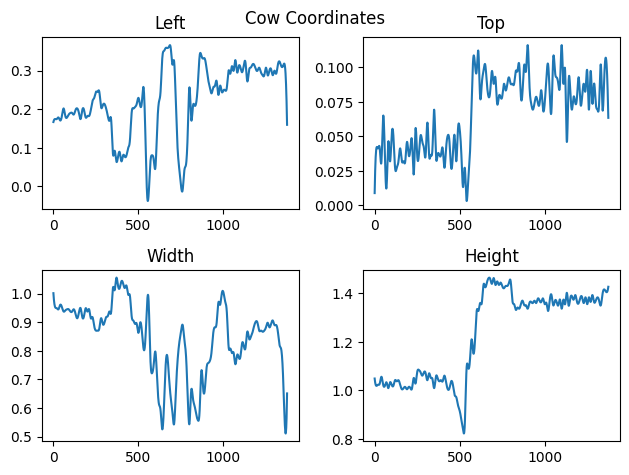

In [78]:
plt.subplot(2,2,1)
plt.plot(range(0,len(X_cow)) , X_cow[0])
plt.title("Left")
plt.subplot(2,2,2)
plt.plot(range(0,len(X_cow)) ,X_cow[1])
plt.title("Top")
plt.subplot(2,2,3)
plt.plot(range(0,len(X_cow)) ,X_cow[2])
plt.title("Width")
plt.subplot(2,2,4)
plt.plot(range(0,len(X_cow)) ,X_cow[3])
plt.title("Height")
plt.tight_layout()
plt.suptitle('Cow Coordinates')

# Train model

In [75]:
scores_EM = scores_VI = list()
models_EM = models_VI = list()

for n_components in range(2, 5): # test 2 to 5 n components
    for idx in range(10):  # ten different random starting states
        # defining hidden Markov model using EM
        model_EM = hmm.GaussianHMM(n_components=n_components, random_state=idx,covariance_type = "full", n_iter=50)
        # defining hidden Markov model using VI
        model_VI = vhmm.VariationalGaussianHMM(n_components=n_components, random_state=idx,covariance_type = "full", n_iter=50)

        model_EM.fit(X_cow)
        model_VI.fit(X_cow)

        models_EM.append(model_EM)
        models_VI.append(model_VI)

        scores_EM.append(model_EM.score(X_cow))
        scores_VI.append(model_VI.score(X_cow))

        print(f'Converged [EM]: {model_EM.monitor_.converged}\t\t'f'Score: {scores_EM[-1]}')
        print(f'Converged [VI]: {model_VI.monitor_.converged}\t\t'f'Score: {scores_VI[-1]}')

# get the best model
model_EM = models_EM[np.argmax(scores_EM)]
model_VI = models_VI[np.argmax(scores_VI)]

print(f'The best EM model had a score of {max(scores_EM)} and 'f'{model_EM.n_components} components')
print(f'The best VI model had a score of {max(scores_VI)} and 'f'{model_VI.n_components} components')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
Z_EM = model_EM.predict(X_cow)
Z_VI = model_VI.predict(X_cow)

joblib.dump(model_EM, 'models/EM/hmm_model_cow.pkl')
joblib.dump(model_VI, 'models/Vi/hmm_model_cow.pkl')


Model is not converging.  Current: 9773.016806479765 is not greater than 9773.302834312777. Delta is -0.28602783301175805
Model is not converging.  Current: 9773.009862899618 is not greater than 9773.293276539527. Delta is -0.28341363990875834


Converged [EM]: True		Score: 9778.181772897056
Converged [VI]: True		Score: 9778.181772897056
Converged [EM]: True		Score: 9778.181772191638
Converged [VI]: True		Score: 9778.181772191638
Converged [EM]: True		Score: 9126.20632743812
Converged [VI]: True		Score: 9126.20632743812


Model is not converging.  Current: 9773.228192278693 is not greater than 9773.43793237859. Delta is -0.20974009989731712


Converged [EM]: True		Score: 9778.733361041745
Converged [VI]: True		Score: 9778.733361041745
Converged [EM]: True		Score: 9778.181774245071
Converged [VI]: True		Score: 9778.181774245071
Converged [EM]: True		Score: 7115.174502745433
Converged [VI]: True		Score: 7115.174502745433


Model is not converging.  Current: 9773.127380090818 is not greater than 9773.42005024617. Delta is -0.29267015535151586


Converged [EM]: True		Score: 9778.181774299432
Converged [VI]: True		Score: 9778.181774299432


Model is not converging.  Current: 9772.631640545298 is not greater than 9772.66916209679. Delta is -0.037521551492318395


Converged [EM]: True		Score: 9349.291874198185
Converged [VI]: True		Score: 9349.291874198185
Converged [EM]: True		Score: 9778.181778233442
Converged [VI]: True		Score: 9778.181778233442
Converged [EM]: True		Score: 9621.37341568366
Converged [VI]: True		Score: 9621.37341568366
Converged [EM]: True		Score: 7306.251904283851
Converged [VI]: True		Score: 7306.251904283851


Model is not converging.  Current: 10856.622669469825 is not greater than 10856.83395074929. Delta is -0.2112812794639467


Converged [EM]: True		Score: 9778.542350753178
Converged [VI]: True		Score: 9778.542350753178


Model is not converging.  Current: 10856.438026897473 is not greater than 10856.517620627796. Delta is -0.07959373032281292


Converged [EM]: True		Score: 10943.124459003731
Converged [VI]: True		Score: 10943.124459003731
Converged [EM]: True		Score: 10943.124441208307
Converged [VI]: True		Score: 10943.124441208307


Model is not converging.  Current: 11085.656459952694 is not greater than 11085.851482845068. Delta is -0.1950228923742543
Model is not converging.  Current: 11477.992687663775 is not greater than 11478.692166446952. Delta is -0.6994787831772555


Converged [EM]: True		Score: 10164.975213369436
Converged [VI]: True		Score: 10164.975213369436


Model is not converging.  Current: 10856.637966602779 is not greater than 10856.690427551137. Delta is -0.052460948358202586


Converged [EM]: True		Score: 11526.486840960299
Converged [VI]: True		Score: 11526.486840960299
Converged [EM]: True		Score: 10943.124443247774
Converged [VI]: True		Score: 10943.124443247774


Model is not converging.  Current: 10856.52206070601 is not greater than 10856.700243352463. Delta is -0.17818264645393356


Converged [EM]: True		Score: 10943.124432328108
Converged [VI]: True		Score: 10943.124432328108
Converged [EM]: True		Score: 11108.73350206455
Converged [VI]: True		Score: 11108.73350206455


Model is not converging.  Current: 10856.498771204659 is not greater than 10856.511501235076. Delta is -0.012730030417515081


Converged [EM]: True		Score: 10943.124450950605
Converged [VI]: True		Score: 10943.124450950605
Converged [EM]: True		Score: 12533.730126282275
Converged [VI]: True		Score: 12533.730126282275


Model is not converging.  Current: 12015.109785802446 is not greater than 12015.11251787009. Delta is -0.0027320676435920177


Converged [EM]: True		Score: 9744.843060324074
Converged [VI]: True		Score: 9744.843060324074
Converged [EM]: True		Score: 12509.327934055576
Converged [VI]: True		Score: 12509.327934055576
Converged [EM]: True		Score: 11378.543351584909
Converged [VI]: True		Score: 11378.543351584909
Converged [EM]: True		Score: 12509.328257479694
Converged [VI]: True		Score: 12509.328257479694
Converged [EM]: True		Score: 10898.070555348599
Converged [VI]: True		Score: 10898.070555348599


Model is not converging.  Current: 12236.160184199887 is not greater than 12236.733319936062. Delta is -0.5731357361746632


Converged [EM]: True		Score: 11757.613904923013
Converged [VI]: True		Score: 11757.613904923013
Converged [EM]: True		Score: 12395.078271845265
Converged [VI]: True		Score: 12395.078271845265
Converged [EM]: True		Score: 12533.730114871236
Converged [VI]: True		Score: 12533.730114871236


Model is not converging.  Current: 12216.141059948615 is not greater than 12216.26210314903. Delta is -0.1210432004154427


Converged [EM]: True		Score: 11396.993957993911
Converged [VI]: True		Score: 11396.993957993911
The best EM model had a score of 12533.730126282275 and 4 components
The best VI model had a score of 12533.730126282275 and 4 components


['models/Vi/hmm_model_cow.pkl']

estimated mean and covar of each state

In [70]:
print(f"Moyennes :\n{model_EM.means_}")
# print(f"Covariance :\n{model_EM.covars_}")
print(f"Transmission matrice :\n{model_EM.transmat_}")
print(f"Probabilite initiale :\n{model_EM.startprob_}")
# print(f"Convergence :\n{model.monitor_}")

Moyennes :
[[0.06666643 0.07404479 0.80694931 1.29495217]
 [0.17456054 0.03946835 0.94089136 1.01998546]
 [0.2788971  0.08841336 0.6414857  1.39919565]
 [0.29595844 0.08430198 0.84745106 1.36634607]]
Transmission matrice :
[[9.82378292e-01 1.60182044e-03 1.44180417e-02 1.60184582e-03]
 [2.34587009e-03 9.96715782e-01 4.69174015e-04 4.69174015e-04]
 [5.41569552e-03 1.08114500e-03 9.83771683e-01 9.73147629e-03]
 [5.46042395e-04 5.46042394e-04 4.91498179e-03 9.93992933e-01]]
Probabilite initiale :
[0.125 0.625 0.125 0.125]


Text(0.5, 0.98, 'Cow Coordinates, EM gaussian')

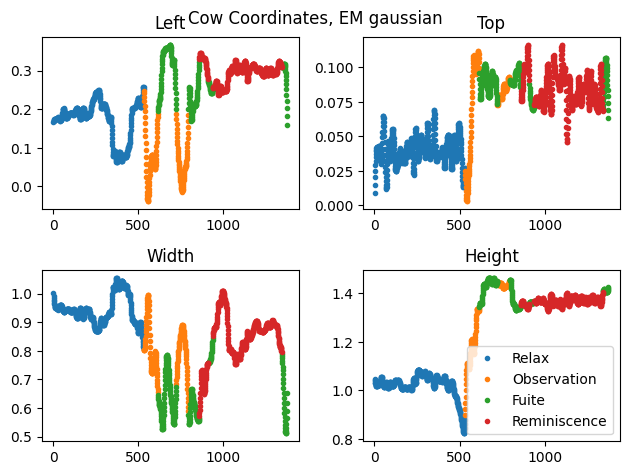

In [71]:
states_EM = pd.unique(Z_EM)
state_names = ['Relax', 'Observation', 'Fuite', 'Reminiscence']

plt.subplot(2,2,1)
for i in states_EM:
    x = np.linspace(1,len(X_cow[0]),len(X_cow[0]))[(Z_EM == i)]
    y = X_cow[0][(Z_EM == i)]
    plt.plot(x, y, '.')
    plt.title("Left")
    # plt.xticks(range(model_EM.n_components), state_names)
    
plt.subplot(2,2,2)
for i in states_EM:
    x = np.linspace(1,len(X_cow[1]),len(X_cow[1]))[(Z_EM == i)]
    y = X_cow[1][(Z_EM == i)]
    plt.plot(x, y, '.')
    plt.title("Top")

plt.subplot(2,2,3)
for i in states_EM:
    x = np.linspace(1,len(X_cow[2]),len(X_cow[2]))[(Z_EM == i)]
    y = X_cow[2][(Z_EM == i)]
    plt.plot(x, y, '.')
    plt.title("Width")

plt.subplot(2,2,4)
for i in states_EM:
    x = np.linspace(1,len(X_cow[3]),len(X_cow[3]))[(Z_EM == i)]
    y = X_cow[3][(Z_EM == i)]
    plt.plot(x, y, '.')
    plt.title("Height")

plt.tight_layout()
plt.legend(labels=state_names, loc="lower right", ncol=1)
plt.suptitle('Cow Coordinates, EM gaussian')

Text(0.5, 0.98, 'Cow Coordinates, VI gaussian')

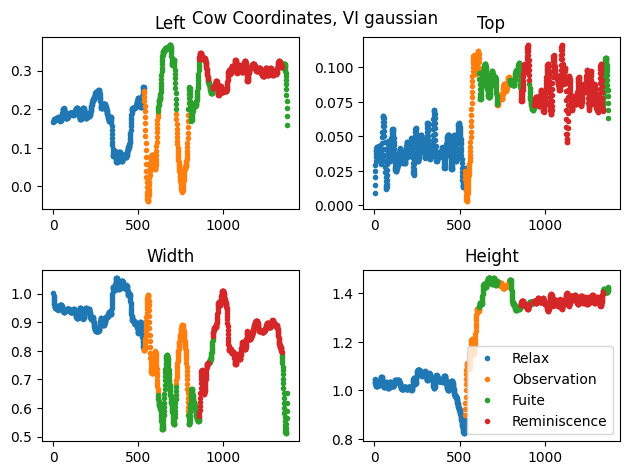

In [72]:
states_VI = pd.unique(Z_VI)

plt.subplot(2,2,1)
for i in states_VI:
    x = np.linspace(1,len(X_cow[0]),len(X_cow[0]))[(Z_VI == i)]
    y = X_cow[0][(Z_VI == i)]
    plt.plot(x, y, '.')
    plt.title("Left")
plt.subplot(2,2,2)
for i in states_VI:
    x = np.linspace(1,len(X_cow[1]),len(X_cow[1]))[(Z_VI == i)]
    y = X_cow[1][(Z_VI == i)]
    plt.plot(x, y, '.')
    plt.title("Top")
plt.subplot(2,2,3)
for i in states_VI:
    x = np.linspace(1,len(X_cow[2]),len(X_cow[2]))[(Z_VI == i)]
    y = X_cow[2][(Z_VI == i)]
    plt.plot(x, y, '.')
    plt.title("Width")
plt.subplot(2,2,4)
for i in states_VI:
    x = np.linspace(1,len(X_cow[3]),len(X_cow[3]))[(Z_VI == i)]
    y = X_cow[3][(Z_VI == i)]
    plt.plot(x, y, '.')
    plt.title("Height")


plt.tight_layout()
plt.legend(labels=state_names, loc="lower right", ncol=1)
plt.suptitle('Cow Coordinates, VI gaussian')

In [74]:
df=pd.DataFrame({'states':Z_EM})
df.to_csv("../INF889E Project/Trained data/EM/cow_coords_hmmstates.csv")
df=pd.DataFrame({'states':Z_VI})
df.to_csv("../INF889E Project/Trained data/VI/cow_coords_hmmstates.csv")